In [1]:
import cv2
import numpy as np
import pytesseract as ocr
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("img/bitmap.pbm",0)
img = img/255
img = 1-img

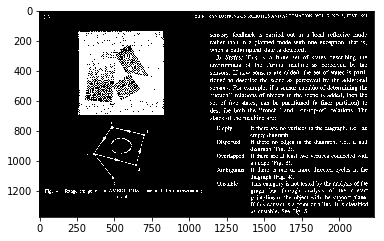

In [3]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [4]:
kernel1 = np.ones((1, 100), np.uint8)
kernel2 = np.ones((200, 1), np.uint8)
kernel3 = np.ones((1, 30), np.uint8)
kernel4 = np.ones((10,1),np.uint8)

In [5]:
dilate1 = cv2.dilate(img, kernel1)
erode1 = cv2.erode(dilate1, kernel1)

In [6]:
dilate2 = cv2.dilate(img, kernel2)
erode2 = cv2.erode(dilate2, kernel2)

In [7]:
intersection = cv2.bitwise_and(erode1, erode2)

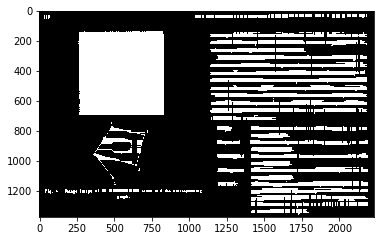

In [8]:
fig = plt.figure()
plt.imshow(intersection,cmap="gray")
plt.show()

In [9]:
closing = cv2.dilate(intersection, kernel3)

In [10]:
#closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel4)

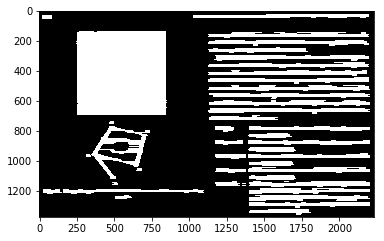

In [11]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [12]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing,connectivity=4)

In [13]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

52


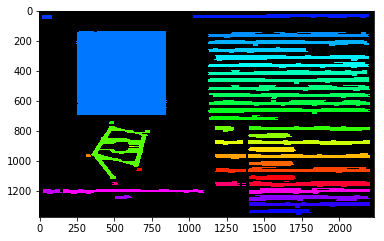

In [14]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [15]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [16]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
boxes = [cv2.boundingRect(contour) for contour in cnts]

36


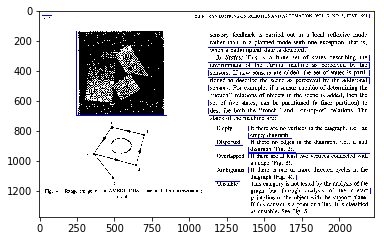

In [145]:
img3 = np.zeros((img.shape[0],img.shape[1],3),np.uint8)

img3[:,:,0] = img
img3[:,:,1] = img
img3[:,:,2] = img

area = np.array([None for i in range(len(boxes))])

comps = (1-img3)*255
c = 0
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    change_v = 0
    change_h = 0
    tmp = img[x:x+w,y:y+h]
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
            if(j < img.shape[0]):
                change_v += abs(img[j][k]-img[j+1][k])
            if(k < img.shape[1]):
                change_h += abs(img[j][k]-img[j][k+1])
          
    area[i] = (p/(h*w), (change_v+change_h))
    
    
    if(p/(h*w) > 0.15):
        cv2.rectangle(comps,(y,x),(y+h,x+w),(0,0,255))
        c+=1
print(c)
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [146]:
print(area)

[(0.2212551534585433, 2200.0) (0.2129659748877757, 4384.0) (0.05, 7.0)
 (0.03333333333333333, 3.0) (0.2271877278057748, 4623.0)
 (0.2255184331797235, 592.0) (0.1728, 470.0) (0.1111111111111111, 10.0)
 (0.2287027218098268, 5397.0) (0.20285181320939644, 4172.0) (0.0, 0.0)
 (0.0, 0.0) (0.13472706155632985, 103.0) (0.31013834400165186, 974.0)
 (0.11764705882352941, 18.0) (0.22674897119341564, 4750.0)
 (0.239673635900051, 1802.0) (0.1355263157894737, 85.0)
 (0.2404118404118404, 1252.0) (0.20584795321637428, 4227.0)
 (0.2102657634184471, 1637.0) (0.11424903722721438, 66.0)
 (0.2585167714884696, 1248.0) (0.27750309023485786, 4526.0)
 (0.2379145355551889, 1874.0) (0.25108979947689625, 1087.0)
 (0.21000649772579597, 4166.0) (0.03333333333333333, 3.0)
 (0.2536812674743709, 1747.0) (0.24427480916030533, 717.0)
 (0.057610488842580534, 4087.0) (0.21441218721812047, 4353.0)
 (0.13658536585365855, 97.0) (0.2867769744160178, 2639.0)
 (0.20486583184257603, 5616.0) (0.21101967799642218, 5753.0)
 (0.2154

In [143]:
area = np.zeros((len(boxes)))
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    p = 0
    b = 0
    for j in range(x,x+w):
        for k in range(y,y+h):
            if(1-img[j][k]) == 0:
                p += 1
    area[i] = p/(h*w)


In [26]:
print(area.mean())
print(np.median(area))
print(np.var(area))
print((np.std(area)))
print(max(area))

0.19820938897606002
0.21196415297779464
0.013139943310550309
0.11462959177520571
0.7969456728387921


In [31]:
cv2.imwrite("dilate1.pbm",1-dilate1)
cv2.imwrite("erode1.pbm",1-erode1)
cv2.imwrite("dilate2.pbm",1-dilate2)
cv2.imwrite("erode2.pbm",1-erode2)
cv2.imwrite("intersection.pbm",1-intersection)
#cv2.imwrite("result.pbm",1-result)
cv2.imwrite("closing.pbm",1-closing)
cv2.imwrite("comps.png",comps)
cv2.imwrite("labeled.png",labeled_img)

True

In [69]:
for i in range(len(boxes)):
    y,x,h,w = boxes[i]
    tmp = img[x:x+w,y:y+h]
    phrase = ocr.image_to_string(tmp, lang='eng')
    cv2.imwrite("results/tmp/%d.png" % i,(1-tmp)*255)
    print(phrase)

as unstable. See Fig. 3.
SGC eO lite we OO Oem COR ie st


Sener A biNt=Mn OME Se MEO )e)( 01M SL N0UAS ommc1ble) 810) UmmS) Cem



Range image of an AMBIGUOUS scene and the corresponding
graph but through analysis of the contact





This category is not tested by the analysis of the
diagrapn (Fig. 4).

Ambiguous
If there is one or more directed cycies in tne
Piston es (ae)


Tf there are at least two Vertices connectea With
(elty4e:/0) (met aeea me
Bite oneal
SGME AN oicoMN NOME c Otc MBIT MEA om Cstc toe: 0)0 RD oem MBO IIOG

100) Amel tod eo: 10) 008


Tt there are no vertices in the diagraph, 1.¢., an

States of the machine arc:
describe both the touch and on-top-o1 relations. The
Set Of five States, Can be partitioned (a finer partition) to
“touch relations Of Objects in the scene is added, then the
sensors. For example, if a sensor Capable Of determining the
tioned to describe the scene as perceived by the additional
sensors. If new sensors are added, the Set Of States is parti-

In [117]:
a = np.array([(i,i+1) for i in range(10)])

In [118]:
a


array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10]])

In [124]:
a[: , 1:2]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])